## **MODEL BUILDING**

**Import Basic Libraries**

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Import .CSV Dataset**

In [0]:
df_csv = pd.read_csv("dataset_model.csv",sep=",")

**Reading Columns In Dataset**

In [27]:
df_csv.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Reading Top Head Values**

In [28]:
df_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df_csv.shape

(614, 13)

In [30]:
len(df_csv['Loan_ID'].unique())

614

In [31]:
df_unqid = df_csv['Loan_ID']
df_csv=df_csv.drop(columns='Loan_ID')
df_csv.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Continuous Variables:-**

In [32]:
len(df_csv['ApplicantIncome'].unique())

505

In [33]:
len(df_csv['CoapplicantIncome'].unique())

287

In [34]:
len(df_csv['LoanAmount'].unique())

204

In [61]:
num_cols = df_csv._get_numeric_data().columns
con_var = []
for i in num_cols:
  if(len(df_csv[i].unique())) > int(df_csv.shape[0]/25):
     con_var.append(i)
print(con_var)  

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


**Categorical Variables**

In [38]:
df_csv['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [39]:
df_csv['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [40]:
df_csv['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [41]:
df_csv['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [42]:
df_csv['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [63]:
df_csv['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [66]:
df_csv['Credit_History'].unique()

array([ 1.,  0., nan])

In [43]:
df_csv['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [44]:
df_csv['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [67]:
cat_var1=list(set(df_csv.columns) - set(con_var))
for i in cat_var1:
  print(i, "\t", len(df_csv[i].unique()))

Married 	 3
Loan_Status 	 2
Self_Employed 	 3
Gender 	 3
Property_Area 	 3
Credit_History 	 3
Education 	 2
Dependents 	 5
Loan_Amount_Term 	 11


**Problem 1 - Using dataset_model.csv on Loan Application, build a Classification model to predict Loan Status(Target Variable)**

In [68]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_csv['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [69]:
print(df_target['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


**Problem 2 - Use innovative methods for Outlier handling & Missing Values Imputation.**

**Outliers Handling:-**

In [70]:
#Check Skewness
for i in con_var:
  print(str(i)+' : '+str(df_csv[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


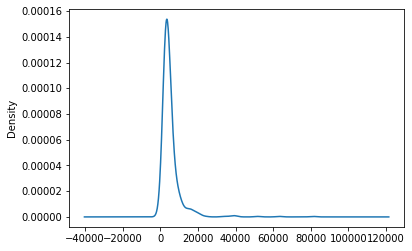

In [72]:
df_csv['ApplicantIncome'].plot.kde()

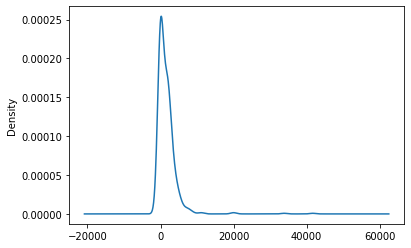

In [73]:
df_csv['CoapplicantIncome'].plot.kde()

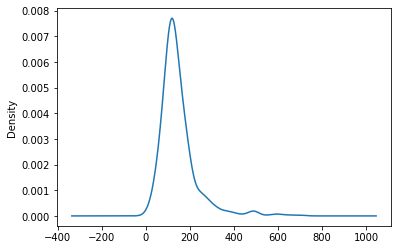

In [75]:
df_csv['LoanAmount'].plot.kde()

In [79]:
#Using Quantile flooring  at 5% & 95%
for i in con_var:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_csv[i].quantile(0.05)
  upper_cutoff = df_csv[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_csv[i] = np.where(df_csv[i] < lower_cutoff,lower_cutoff,df_csv[i])
  df_csv[i] = np.where(df_csv[i] > upper_cutoff, upper_cutoff,df_csv[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_csv[i].skew()))

Revised skew after Outlier handling ApplicantIncome : 1.7637799807028802
Revised skew after Outlier handling CoapplicantIncome : 0.8452039718003408
Revised skew after Outlier handling LoanAmount : 1.0594654991821644


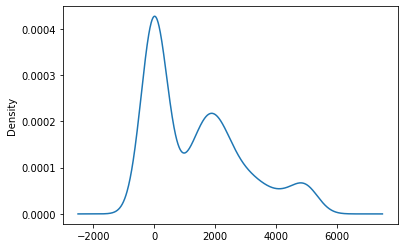

In [80]:
df_csv['CoapplicantIncome'].plot.kde()

-0.18689617502427236


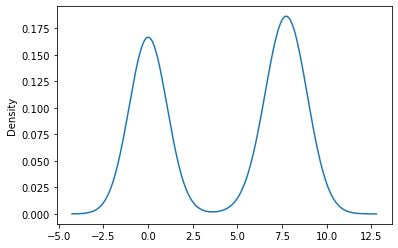

In [82]:
df_csv["Log_CoapplicantIncome"] = df_csv["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_csv['Log_CoapplicantIncome'].skew())
df_csv['Log_CoapplicantIncome'].plot.kde()

In [83]:
Q1=df_csv.quantile(0.1)
Q3=df_csv.quantile(0.9)
IQR=Q3-Q1
df_remove = ((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).sum()
df_remove

ApplicantIncome           0
CoapplicantIncome         0
Credit_History            0
Dependents                0
Education                 0
Gender                    0
LoanAmount                0
Loan_Amount_Term         71
Loan_Status               0
Log_CoapplicantIncome     0
Married                   0
Property_Area             0
Self_Employed             0
dtype: int64

In [84]:
df_qua=df_csv[~((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_csv.shape)
print(df_qua.shape)

(614, 13)
(543, 13)


**Handling Missing Data(Data Imputation):-**

In [87]:
df_csv.isnull().sum()

Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
Log_CoapplicantIncome     0
dtype: int64

In [88]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_csv.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_csv.shape[1]/3))]

,row,mis_cnt


In [0]:
#Populating Categorical with Mode
for cols in cat_var1:
  if ( df_csv[cols].isnull().sum() > 0):
    df_csv[cols] = df_csv[cols].fillna(df_csv[cols].mode().iloc[0])

In [94]:
#Checking for missing values post Mode imputation
df_csv[cat_var1].isnull().sum()

Married             0
Loan_Status         0
Self_Employed       0
Gender              0
Property_Area       0
Credit_History      0
Education           0
Dependents          0
Loan_Amount_Term    0
dtype: int64

In [95]:
df_csv.median()

ApplicantIncome          3812.500000
CoapplicantIncome        1188.500000
LoanAmount                128.000000
Loan_Amount_Term          360.000000
Credit_History              1.000000
Log_CoapplicantIncome       7.080284
dtype: float64

In [0]:
#Populate Continous with Median
for cols in con_var:
  if ( df_csv[cols].isnull().sum() > 0):
    df_csv[cols] = df_csv[cols].fillna(df_csv[cols].median())

In [97]:
#Check which of continous columns have missing value
df_csv[con_var].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [98]:
df_csv.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Log_CoapplicantIncome    0
dtype: int64

**So, Now There Are No Or Zero Null Values Left In Dataset**

**Problem 3 ------Use Label Encoder as encoding technique on features , predict using below algorithms------**

**Problem 3.1 - Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -**

In [0]:
df_enc=df_csv.copy()
for j in cat_var1:
  df_enc['enc_'+str(j)] = le.fit_transform(df_enc[j])
df_enc = df_enc.drop(columns = cat_var1)
df_enc = df_enc.drop('enc_Loan_Status',axis=1)

In [189]:
df_enc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,enc_Married,enc_Self_Employed,enc_Gender,enc_Property_Area,enc_Credit_History,enc_Education,enc_Dependents,enc_Loan_Amount_Term
0,5849.0,0.0,128.0,0.000000,0,0,1,2,1,0,0,8
1,4583.0,1508.0,128.0,7.318540,1,0,1,0,1,0,1,8
2,3000.0,0.0,66.0,0.000000,1,1,1,2,1,0,0,8
3,2583.0,2358.0,120.0,7.765569,1,0,1,2,1,1,0,8
4,6000.0,0.0,141.0,0.000000,0,0,1,2,1,0,0,8


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_enc, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [325]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [326]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Testing Data :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Testing Data :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


In [327]:
clf_dt=LogisticRegression(random_state=42)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [328]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [329]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 26  22]
 [  2 104]]
Accuracy of Dtree Model:
0.8441558441558441
Precision of DTree Model:
0.8253968253968254
Recall of DTree Model:
0.9811320754716981
F1 Score of DTree Model:
0.8965517241379309


In [330]:
roc_auc_score(Y_test,y_pred)

0.7613993710691824

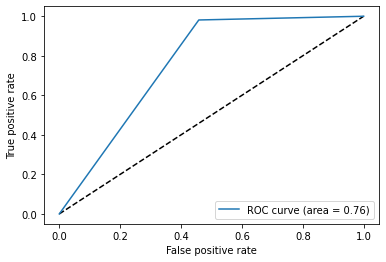

In [331]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Parameter Tunning Using GridSearchCV In Logistic Regression:-**

In [332]:
clf_dt = LogisticRegression()
param_grid = {
   'random_state': [  10, 25,30, 50 ],
   'class_weight' : ['balanced']}
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred= clf_best_dt.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [333]:
y_pred = clf_best_dt.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [334]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[32 16]
 [22 84]]
Accuracy of Dtree Model:
0.7532467532467533
Precision of DTree Model:
0.84
Recall of DTree Model:
0.7924528301886793
F1 Score of DTree Model:
0.8155339805825242


In [335]:
roc_auc_score(Y_test,y_pred)

0.729559748427673

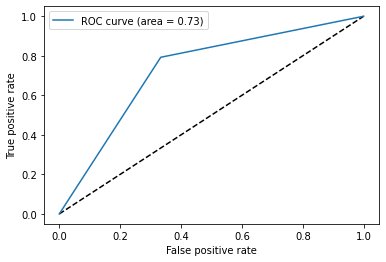

In [336]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Problem 3.2 - Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on
Precision ,Recall & F1 Score ,AUROC**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_enc, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [338]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [339]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [340]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[31 17]
 [ 7 99]]
Accuracy of Dtree Model:
0.8441558441558441
Precision of DTree Model:
0.853448275862069
Recall of DTree Model:
0.9339622641509434
F1 Score of DTree Model:
0.8918918918918919


In [341]:
roc_auc_score(Y_test,y_pred)

0.7898977987421384

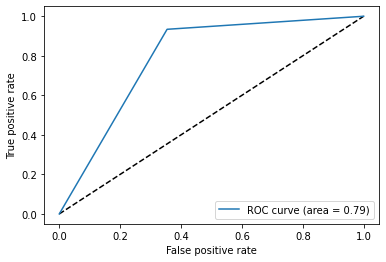

In [342]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Parameter Tunning Using GridSearchCV In Random Forest Classifier:**

In [343]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [  10, 20,3, 5, 50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 5]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [344]:
y_pred = clf_best_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [345]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 28  20]
 [  2 104]]
Accuracy of Dtree Model:
0.8571428571428571
Precision of DTree Model:
0.8387096774193549
Recall of DTree Model:
0.9811320754716981
F1 Score of DTree Model:
0.9043478260869565


In [346]:
roc_auc_score(Y_test,y_pred)

0.7822327044025157

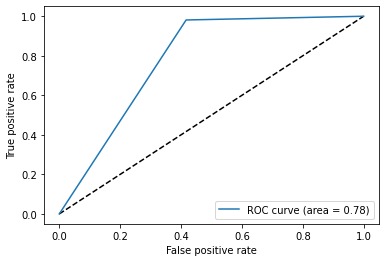

In [347]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Problem 4 - ----- Use One hot Encoder as encoding technique on feature , predict using the below algorithms ----**

**Problem 4.1 - Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC**

In [348]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df_csv.copy()
df_ohe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_CoapplicantIncome
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0.000000
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,7.318540
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,7.765569
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,0.000000


In [0]:
for i in cat_var1:
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  df_ohe = df_ohe.join(enc_rel)
  df_ohe = df_ohe.drop(i,axis=1)
df_ohe = df_ohe.drop('Loan_Status_0',axis=1)
df_ohe = df_ohe.drop('Loan_Status_1',axis=1)

In [350]:
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,Married_0,Married_1,Self_Employed_0,Self_Employed_1,Gender_0,Gender_1,Property_Area_0,Property_Area_1,Property_Area_2,Credit_History_0,Credit_History_1,Education_0,Education_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,Loan_Amount_Term_9
0,5849.0,0.0,128.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4583.0,1508.0,128.0,7.318540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000.0,0.0,66.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2583.0,2358.0,120.0,7.765569,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000.0,0.0,141.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [352]:
clf_dt=LogisticRegression(random_state=42)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [353]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [354]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 25  23]
 [  1 105]]
Accuracy of Dtree Model:
0.8441558441558441
Precision of DTree Model:
0.8203125
Recall of DTree Model:
0.9905660377358491
F1 Score of DTree Model:
0.8974358974358975


In [355]:
roc_auc_score(Y_test,y_pred)

0.7556996855345911

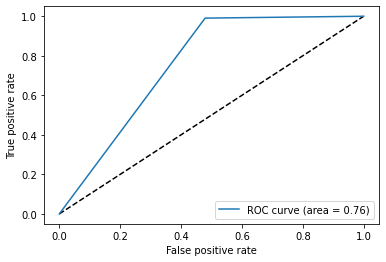

In [305]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Parameter Tunning Using GridSearchCV In Logistic Regression:-**

In [356]:
clf_dt = LogisticRegression()
param_grid = {
   'random_state': [  10, 20 ,40, 50,80 ],
   'class_weight' : ['balanced']}
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred= clf_best_dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [357]:
y_pred = clf_best_dt.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [358]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[38 10]
 [23 83]]
Accuracy of Dtree Model:
0.7857142857142857
Precision of DTree Model:
0.8924731182795699
Recall of DTree Model:
0.7830188679245284
F1 Score of DTree Model:
0.8341708542713568


In [359]:
roc_auc_score(Y_test,y_pred)

0.7873427672955975

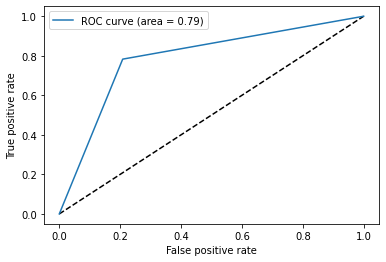

In [360]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Problem 4.2 - Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [362]:
clf_dt = RandomForestClassifier(random_state=42)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [363]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [364]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[31 17]
 [ 7 99]]
Accuracy of Dtree Model:
0.8441558441558441
Precision of DTree Model:
0.853448275862069
Recall of DTree Model:
0.9339622641509434
F1 Score of DTree Model:
0.8918918918918919


In [365]:
roc_auc_score(Y_test,y_pred)

0.7898977987421384

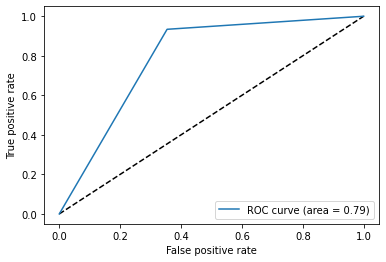

In [366]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Parameter Tunning Using GridSearchCV In Random Forest Classifier:-**

In [367]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [  10, 20,2, 5, 50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [368]:
y_pred = clf_best_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [369]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 27  21]
 [  1 105]]
Accuracy of Dtree Model:
0.8571428571428571
Precision of DTree Model:
0.8333333333333334
Recall of DTree Model:
0.9905660377358491
F1 Score of DTree Model:
0.9051724137931034


In [370]:
roc_auc_score(Y_test,y_pred)

0.7765330188679245

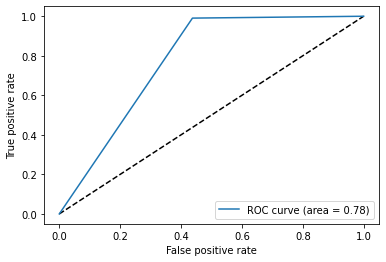

In [371]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Problem 5 - Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?**

**In Label Encoding:-**

**Logistic Regression Gives An Accuracy Of 84% , Precision Of 82% , Recall Of 98% % F1 Score Of 89%**
**But, After Tunning The Parameters - Accuracy Goes Down To 75% , Precison Goes To 84% , Recall Goes Down To 79% & F1 Score Goes Down To 81%**
**So, Logoistic Regression Technique In Label Encoding Gives Better Result Without Tunning The Parameters**

**Random Forest Classifier Gives An Accuracy Of 84% , Precision Of 85% , Recall Of 93% % F1 Score Of 89%**
**But, After Tunning The Parameters - Accuracy Goes To 85% , Precison Goes To 83% , Recall Goes Down To 98% & F1 Score Goes Down To 90%**
**So, Random Forest Classifier Technique In Label Encoding Gives Better Result After Tunning The Parameters**


**In One Hot Encoding:-**

**Logistic Regression Gives An Accuracy Of 84% , Precision Of 82% , Recall Of 99% % F1 Score Of 89%**
**But, After Tunning The Parameters - Accuracy Goes Down To 78% , Precison Goes To 89% , Recall Goes Down To 78% & F1 Score Goes Down To 83%**
**So, Logoistic Regression Technique In One Hot Encoding Also Gives Better Result Without Tunning The Parameters**

**Random Forest Classifier Gives An Accuracy Of 84% , Precision Of 85% , Recall Of 93% % F1 Score Of 89%**
**But, After Tunning The Parameters - Accuracy Goes To 85% , Precison Goes To 83% , Recall Goes Down To 99% & F1 Score Goes Down To 90%**
**So, Random Forest Classifier Technique In One Hot Encoding Also Gives Better Result After Tunning The Parameters**


